# Plots of CCLM domains

In [32]:
import xarray as xr
import matplotlib.pyplot as plt
import valenspy as vp


# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'


manager = vp.InputManager(machine=machine)



In [33]:
ds_mod_cpm = manager.load_data(model, ['tas'], freq="daily", path_identifiers=["BE28_Nukleus", "mean"])


File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/BE28_Nukleus/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


In [34]:
# 1. Extract the top and bottom rows (along rlat)
top = ds.isel(rlat=0)  # First row (top)
bottom = ds.isel(rlat=-1)  # Last row (bottom)

# 2. Extract the left and right columns (along rlon), except for the corners already covered by top and bottom
left = ds.isel(rlon=0).isel(rlat=slice(1, -1))  # First column (left), excluding corners
right = ds.isel(rlon=-1).isel(rlat=slice(1, -1))  # Last column (right), excluding corners

# 3. Concatenate the selections
# Concatenate top and bottom across the rlon dimension (full width of domain)
top_bottom = xr.concat([top, bottom], dim='rlat')

# Concatenate left and right across the rlat dimension (height of domain, excluding already selected corners)
left_right = xr.concat([left, right], dim='rlon')

# 4. Combine both along the appropriate dimensions
border_cells = xr.concat([top_bottom, left_right], dim='rlat')

da_border_cells = border_cells['tas']


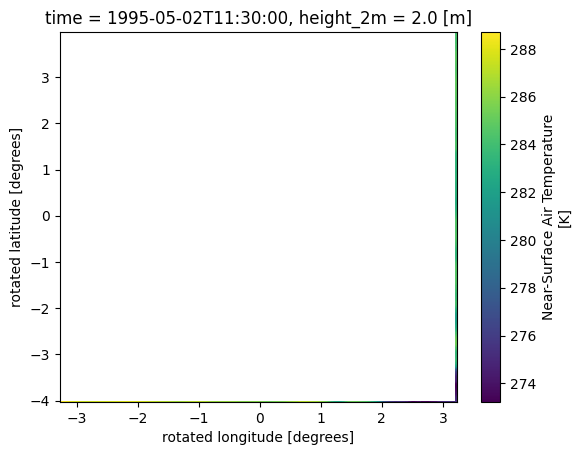

In [35]:
bda_border_cells_sorted = da_border_cells.sortby(['rlat', 'rlon'])

# Now plot the sorted DataArray
da_border_cells_sorted.plot()

In [36]:
experiments = ["EUR11_1994_NU_TT_EC_TSO"]  #["CB2_CCLM_EUR11_ERA5_evaluation_urb"]

In [37]:
ds_eur11 = manager.load_data(model, ['tas'], freq="daily", path_identifiers=["EUR11_1994_NU_TT_EC_TSO", "mean"])


File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
